In [61]:
import numpy as np # needed for formatting data for this tutorial
import pandas as pd # needed for formatting data for this tutorial
import cellex

import os
import matplotlib.pyplot as plt

In [3]:
import scanpy as sc

In [4]:
#Import psoriasis single-cell dataset with fine cell type annotations 
adata = sc.read_h5ad("psoriasis.h5ad")

In [8]:
metadata = adata.obs[["final_clustering"]]

In [78]:
metadata.value_counts()

final_clustering      
Differentiated_KC         19980
Proliferating_KC          15604
Th                        14500
F2                        12509
Differentiated_KC*         9628
VE2                        8001
F3                         6654
F1                         6431
Undifferentiated_KC*       5881
Pericyte_1_non_inflamm     4552
Treg                       3502
Tc                         3424
Inf_mono                   2606
VE3                        2436
Melanocyte                 2388
Pericyte_2_inflamm         2385
LC_3                       2360
moDC_1                     1427
MigDC                      1412
VE1                        1314
DC2                        1273
Mono                       1169
LE1                         843
ILC1_3                      780
DC1                         771
LE2                         740
Macro_1                     740
Schwann1                    704
moDC_2                      618
Macro_2                     546
ILC1_NK          

In [12]:
# Convert to a dataframe with genes as rows and columns as cellids to prepare for CELLLEX to run 
data = pd.DataFrame(
    adata.X.T.toarray(),         # convert sparse to dense
    index=adata.var_names,    # gene names 
    columns=adata.obs_names,     # cell IDs
)

In [14]:
data.head()

index,AAACCTGAGACTAGAT-1-SKN8090576,AAACCTGAGAGACTAT-1-SKN8090576,AAACCTGAGCGCTCCA-1-SKN8090576,AAACCTGAGGACCACA-1-SKN8090576,AAACCTGAGGCTCAGA-1-SKN8090576,AAACCTGAGTATTGGA-1-SKN8090576,AAACCTGAGTGAAGAG-1-SKN8090576,AAACCTGCAATGAAAC-1-SKN8090576,AAACCTGCACAGAGGT-1-SKN8090576,AAACCTGCATCCTTGC-1-SKN8090576,...,TTTGTCACAGAAGCAC-1-SKN8090607,TTTGTCACATTGCGGC-1-SKN8090607,TTTGTCACATTGGTAC-1-SKN8090607,TTTGTCAGTCAAAGCG-1-SKN8090607,TTTGTCAGTTCATGGT-1-SKN8090607,TTTGTCATCAACCAAC-1-SKN8090607,TTTGTCATCAGAAATG-1-SKN8090607,TTTGTCATCCCACTTG-1-SKN8090607,TTTGTCATCTATCGCC-1-SKN8090607,TTTGTCATCTGGCGTG-1-SKN8090607
index,,,,,,,,,,,,,,,,,,,,,
MIR1302-2HG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FAM138A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OR4F5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL627309.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL627309.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
#Create eso object
eso = cellex.ESObject(data=data, annotation=metadata, verbose=True)



Preprocessing - checking input ... input parsed in 0 min 0 sec
Preprocessing - running remove_non_expressed ... excluded 5515 / 33538 genes in 0 min 9 sec
Preprocessing - normalizing data ... data normalized in 0 min 18 sec
Preprocessing - running ANOVA ... excluded 7158 / 28023 genes in 1 min 34 sec


In [16]:
Compute Expression specificity scores 
eso.compute(verbose=True)

Computing DET ... 
    esw ...
    empirical p-values ...
    esw_s ...
    finished in 0 min 19 sec
Computing EP ...
    esw ...
    empirical p-values ...
    esw_s ...
    finished in 0 min 0 sec
Computing GES ...
    esw ...
    empirical p-values ...
    esw_s ...
    finished in 0 min 12 sec
Computing NSI ...
    esw ...
    empirical p-values ...
    esw_s ...
    finished in 0 min 6 sec
Computing ESmu ...
    finished in 0 min 0 sec
Computing ESsd ...
    finished in 0 min 0 sec
Computed ['det.esw', 'det.esw_null', 'det.pvals', 'det.esw_s', 'ep.esw', 'ep.esw_null', 'ep.pvals', 'ep.esw_s', 'ges.esw', 'ges.esw_null', 'ges.pvals', 'ges.esw_s', 'nsi.esw', 'nsi.esw_null', 'nsi.pvals', 'nsi.esw_s', 'esmu', 'essd'].


In [17]:
# Output is a cell x gene dataframe with Expression Specificity Weights (float) for each gene and cell-type. 
#ESmu values lie in the range [0,1].
eso.results["esmu"]

,DC1,DC2,Differentiated_KC,Differentiated_KC*,F1,F2,F3,ILC1_3,ILC1_NK,ILC2,...,Tc,Th,Treg,Undifferentiated_KC*,VE1,VE2,VE3,moDC_1,moDC_2,moDC_3
gene,,,,,,,,,,,,,,,,,,,,,
AL732372.1,0.000000,0.000000,0.683537,0.058337,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.683236,0.0,0.0,0.0,0.000000,0.000000,0.0
AL669831.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003206,0.399323,0.0,0.537141,...,0.033648,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.029015,0.0
FAM87B,0.000000,0.000000,0.000000,0.000000,0.661797,0.645255,0.675737,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
LINC00115,0.000000,0.000000,0.544921,0.000000,0.000000,0.000000,0.002762,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
FAM41C,0.000000,0.000000,0.582852,0.145716,0.000000,0.000000,0.000000,0.169416,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC007325.2,0.110212,0.563467,0.511254,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
AL354822.1,0.000000,0.000000,0.000000,0.000000,0.358636,0.000000,0.513753,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.468673,0.000000,0.0
AC004556.1,0.000000,0.073550,0.189600,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.529270,0.0


In [ ]:
#Create directories for outputs
!mkdir /home/jupyter/CELLEX_output

In [ ]:
#Create directories for outputs
!mkdir /home/jupyter/CELLEX_output/psoriasis

In [25]:
#Save the eso object in different csvs
eso.save_as_csv(keys=["all"], verbose=True,path= "/home/jupyter/CELLEX_output/psoriasis")

Saving results as csv to disk ...
  Saved: /home/jupyter/CELLEX_output/psoriasis/det.esw.csv.gz
  Saved: /home/jupyter/CELLEX_output/psoriasis/det.esw_null.csv.gz
  Saved: /home/jupyter/CELLEX_output/psoriasis/det.pvals.csv.gz
  Saved: /home/jupyter/CELLEX_output/psoriasis/det.esw_s.csv.gz
  Saved: /home/jupyter/CELLEX_output/psoriasis/ep.esw.csv.gz
  Saved: /home/jupyter/CELLEX_output/psoriasis/ep.esw_null.csv.gz
  Saved: /home/jupyter/CELLEX_output/psoriasis/ep.pvals.csv.gz
  Saved: /home/jupyter/CELLEX_output/psoriasis/ep.esw_s.csv.gz
  Saved: /home/jupyter/CELLEX_output/psoriasis/ges.esw.csv.gz
  Saved: /home/jupyter/CELLEX_output/psoriasis/ges.esw_null.csv.gz
  Saved: /home/jupyter/CELLEX_output/psoriasis/ges.pvals.csv.gz
  Saved: /home/jupyter/CELLEX_output/psoriasis/ges.esw_s.csv.gz
  Saved: /home/jupyter/CELLEX_output/psoriasis/nsi.esw.csv.gz
  Saved: /home/jupyter/CELLEX_output/psoriasis/nsi.esw_null.csv.gz
  Saved: /home/jupyter/CELLEX_output/psoriasis/nsi.pvals.csv.gz
  Save

In [26]:
eso

In [19]:
#CELLEX provides a handful of plotting features for quick visualization of results. Below we plot the top 5 ES genes for each cell-type.



In [27]:
df_esmu = eso.results["esmu"].copy()
es_max_genes = [(df_esmu.nlargest(n=5, columns=[col]).index.values) for col in df_esmu]
genes_to_plot = list(set(np.array(es_max_genes).flatten().tolist())) # set() removes duplicates
df_esmu.loc[genes_to_plot].head()

,DC1,DC2,Differentiated_KC,Differentiated_KC*,F1,F2,F3,ILC1_3,ILC1_NK,ILC2,...,Tc,Th,Treg,Undifferentiated_KC*,VE1,VE2,VE3,moDC_1,moDC_2,moDC_3
gene,,,,,,,,,,,,,,,,,,,,,
CLEC6A,0.0,0.974076,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.021658,0.000000,0.000000
XAGE1B,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.153156,0.028448
AC084816.1,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.064784,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
IGLJ2,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
HEPHL1,0.0,0.000000,0.20394,0.987152,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.903297,0.045357,0.0,0.0,0.000000,0.000000,0.000000


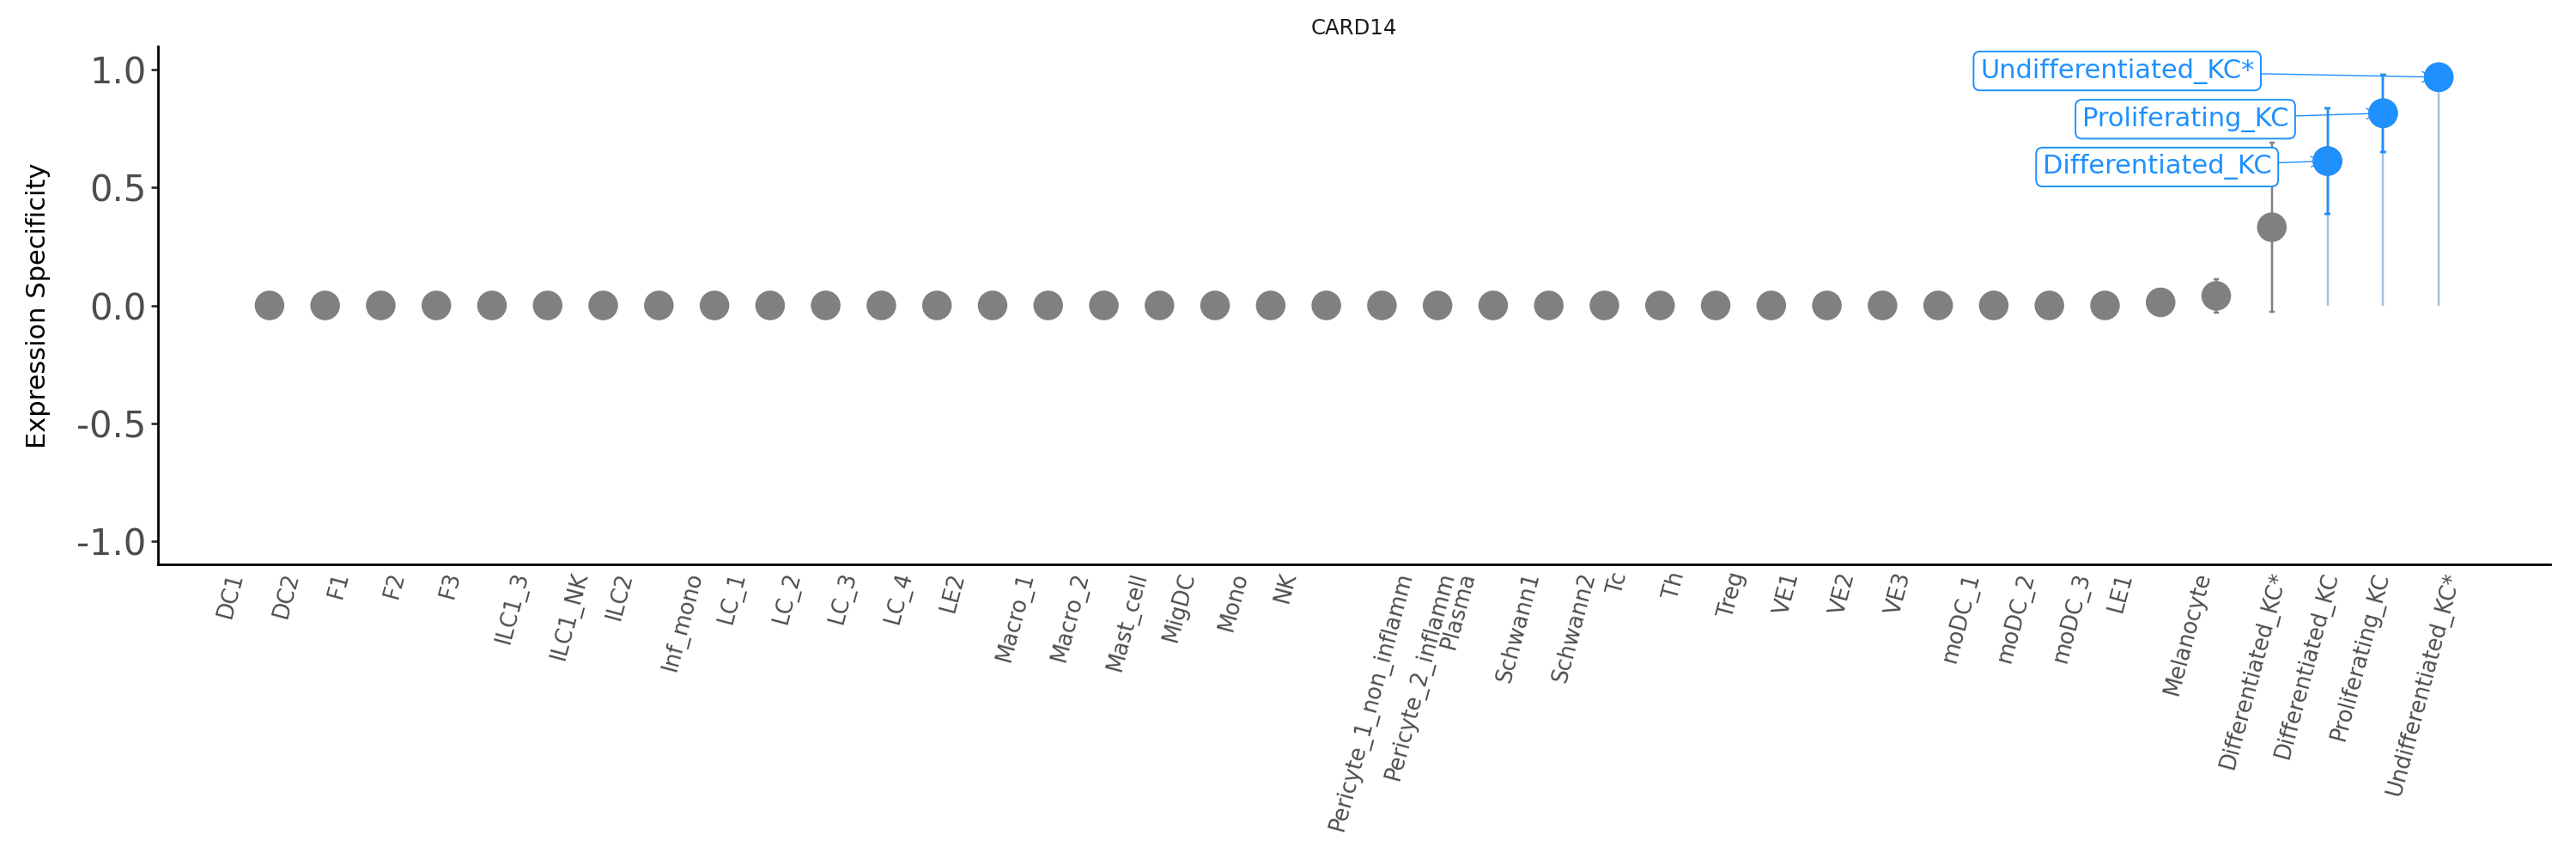

In [34]:
# Plot the expression specificity of the top genes with global score/association score >=0.5 from the Open targets platform

p_esmu = cellex.plotting.gene_profile(genes=["CARD14"], weights=eso.results["esmu"], stddev=eso.results["essd"], highlight_n=3)
p_esmu

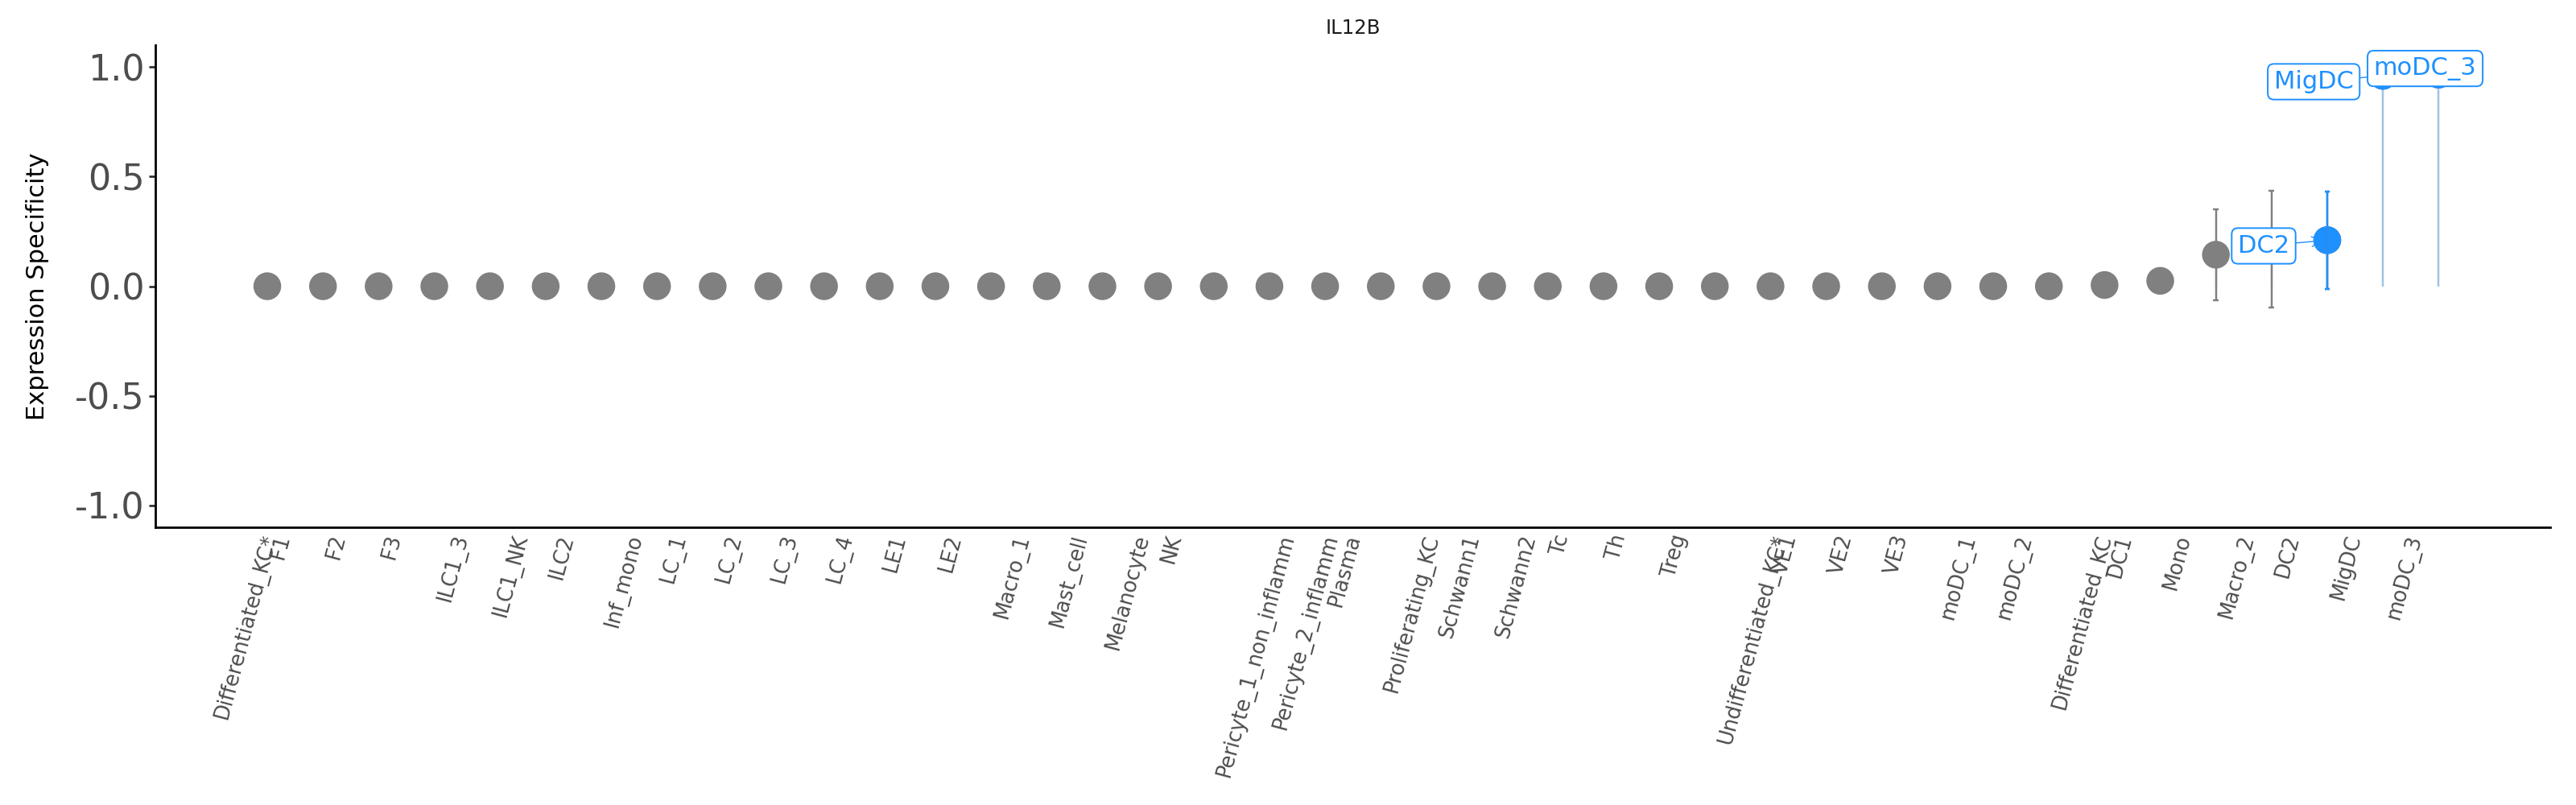

In [50]:
p_esmu = cellex.plotting.gene_profile(genes=["IL12B"], figsize=(16,5),weights=eso.results["esmu"], stddev=eso.results["essd"], highlight_n=3)
p_esmu

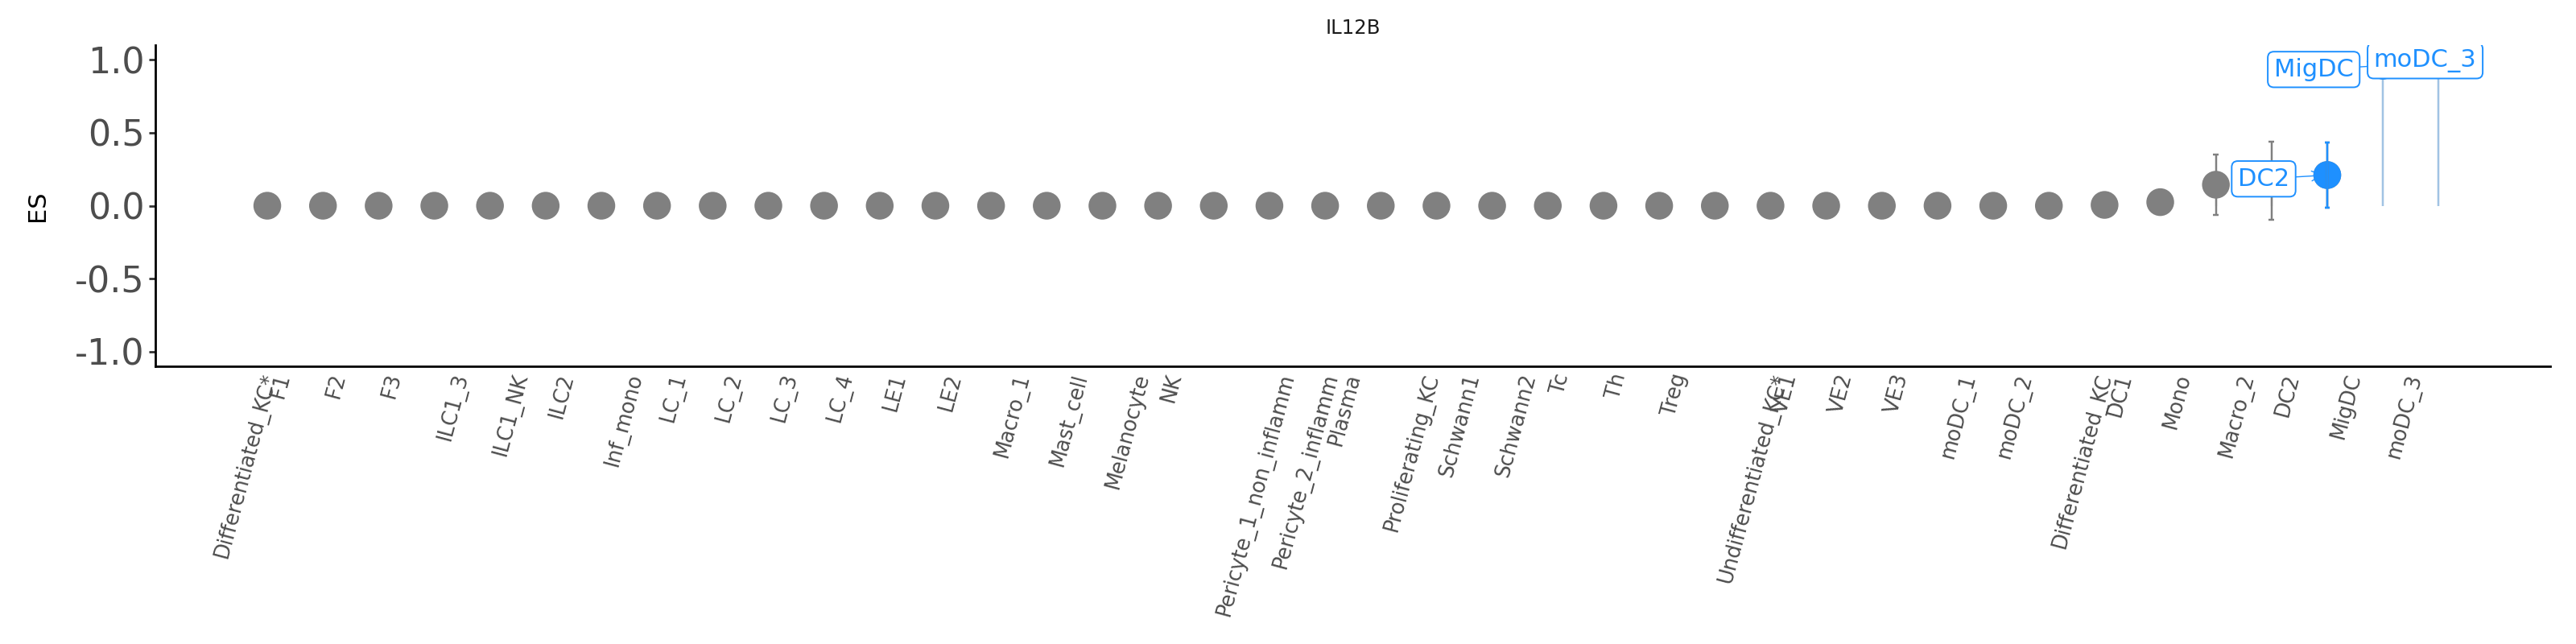

In [49]:
p_esmu

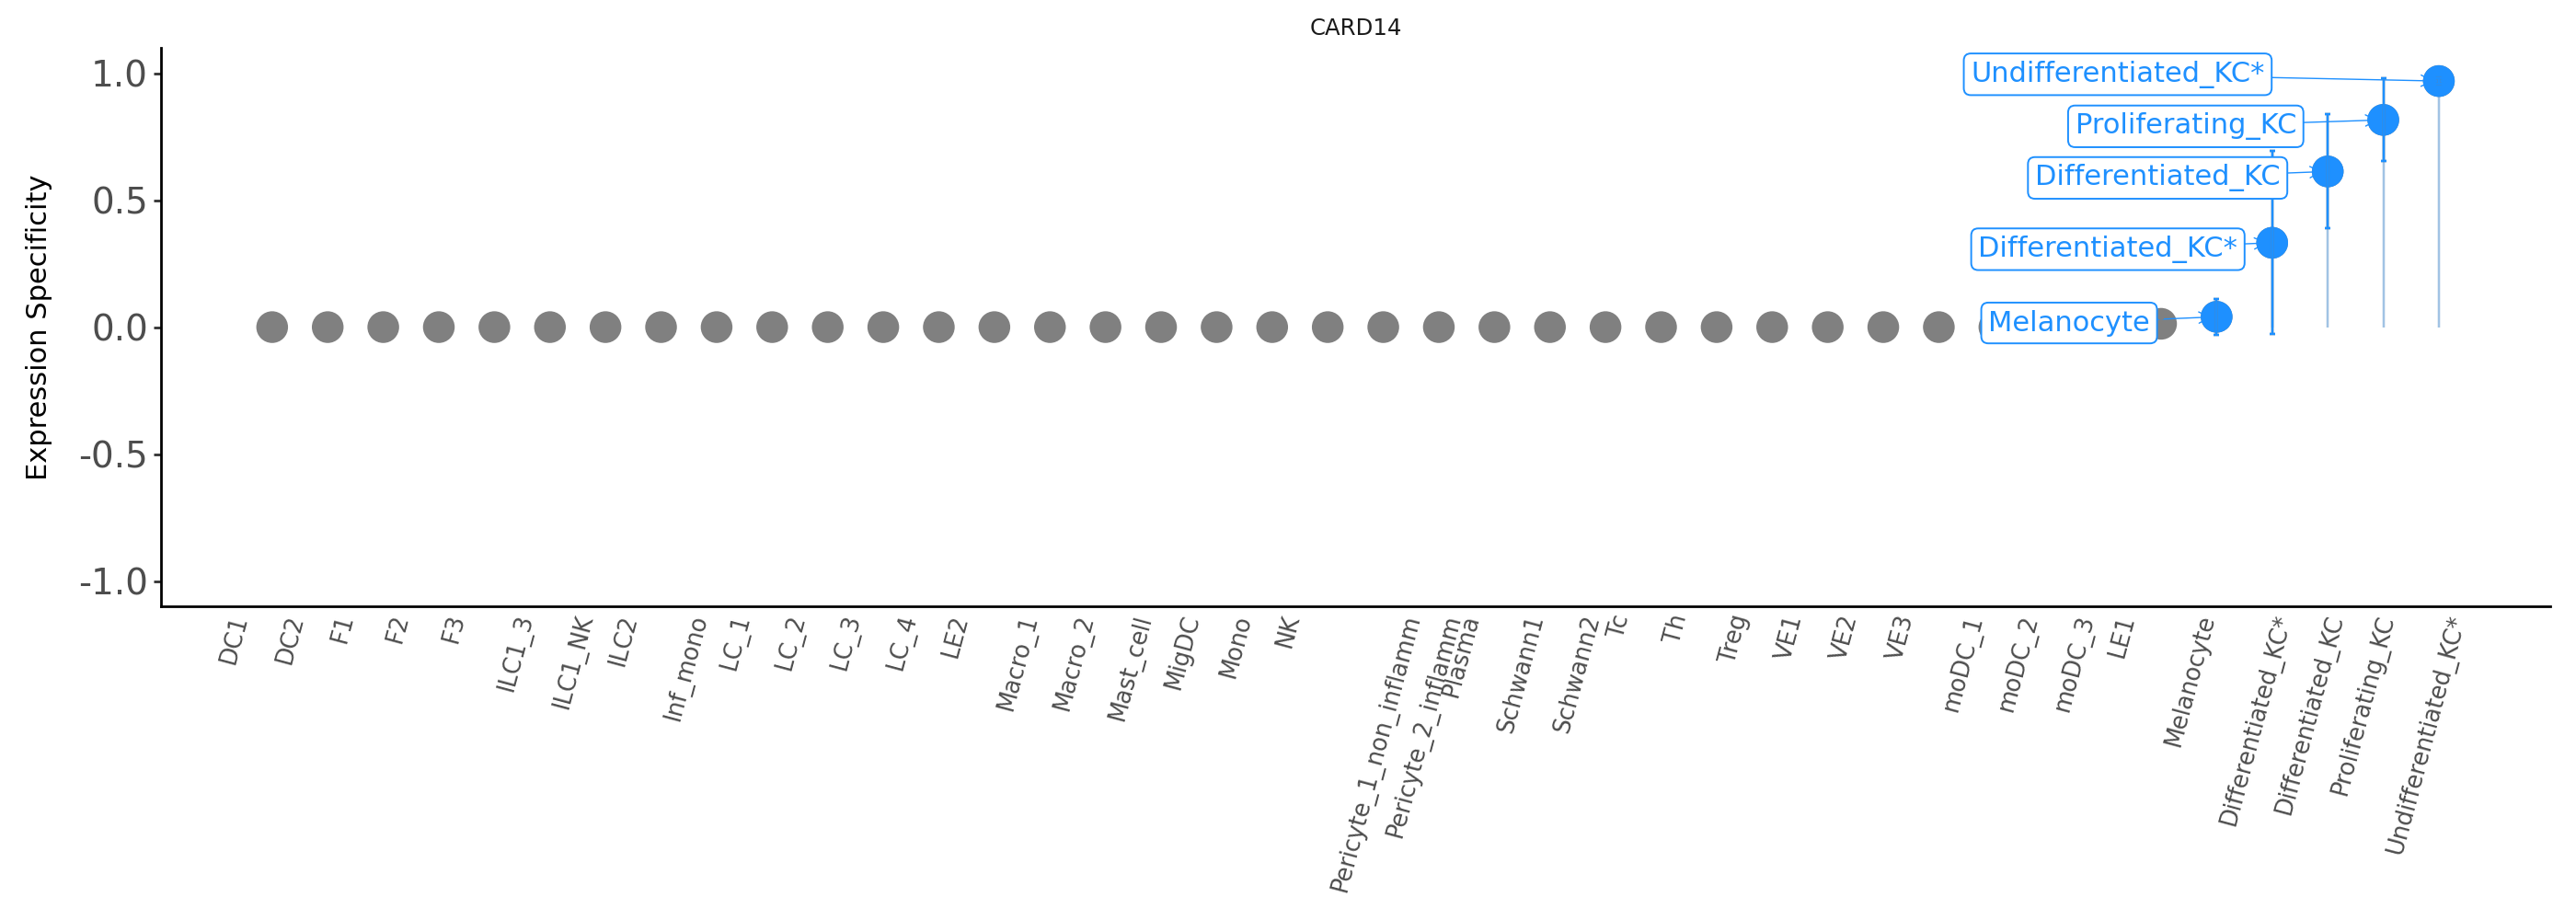

In [58]:
p_esmu = cellex.plotting.gene_profile(genes=["CARD14"],figsize=(14,5), weights=eso.results["esmu"], stddev=eso.results["essd"], highlight_n=5)
p_esmu

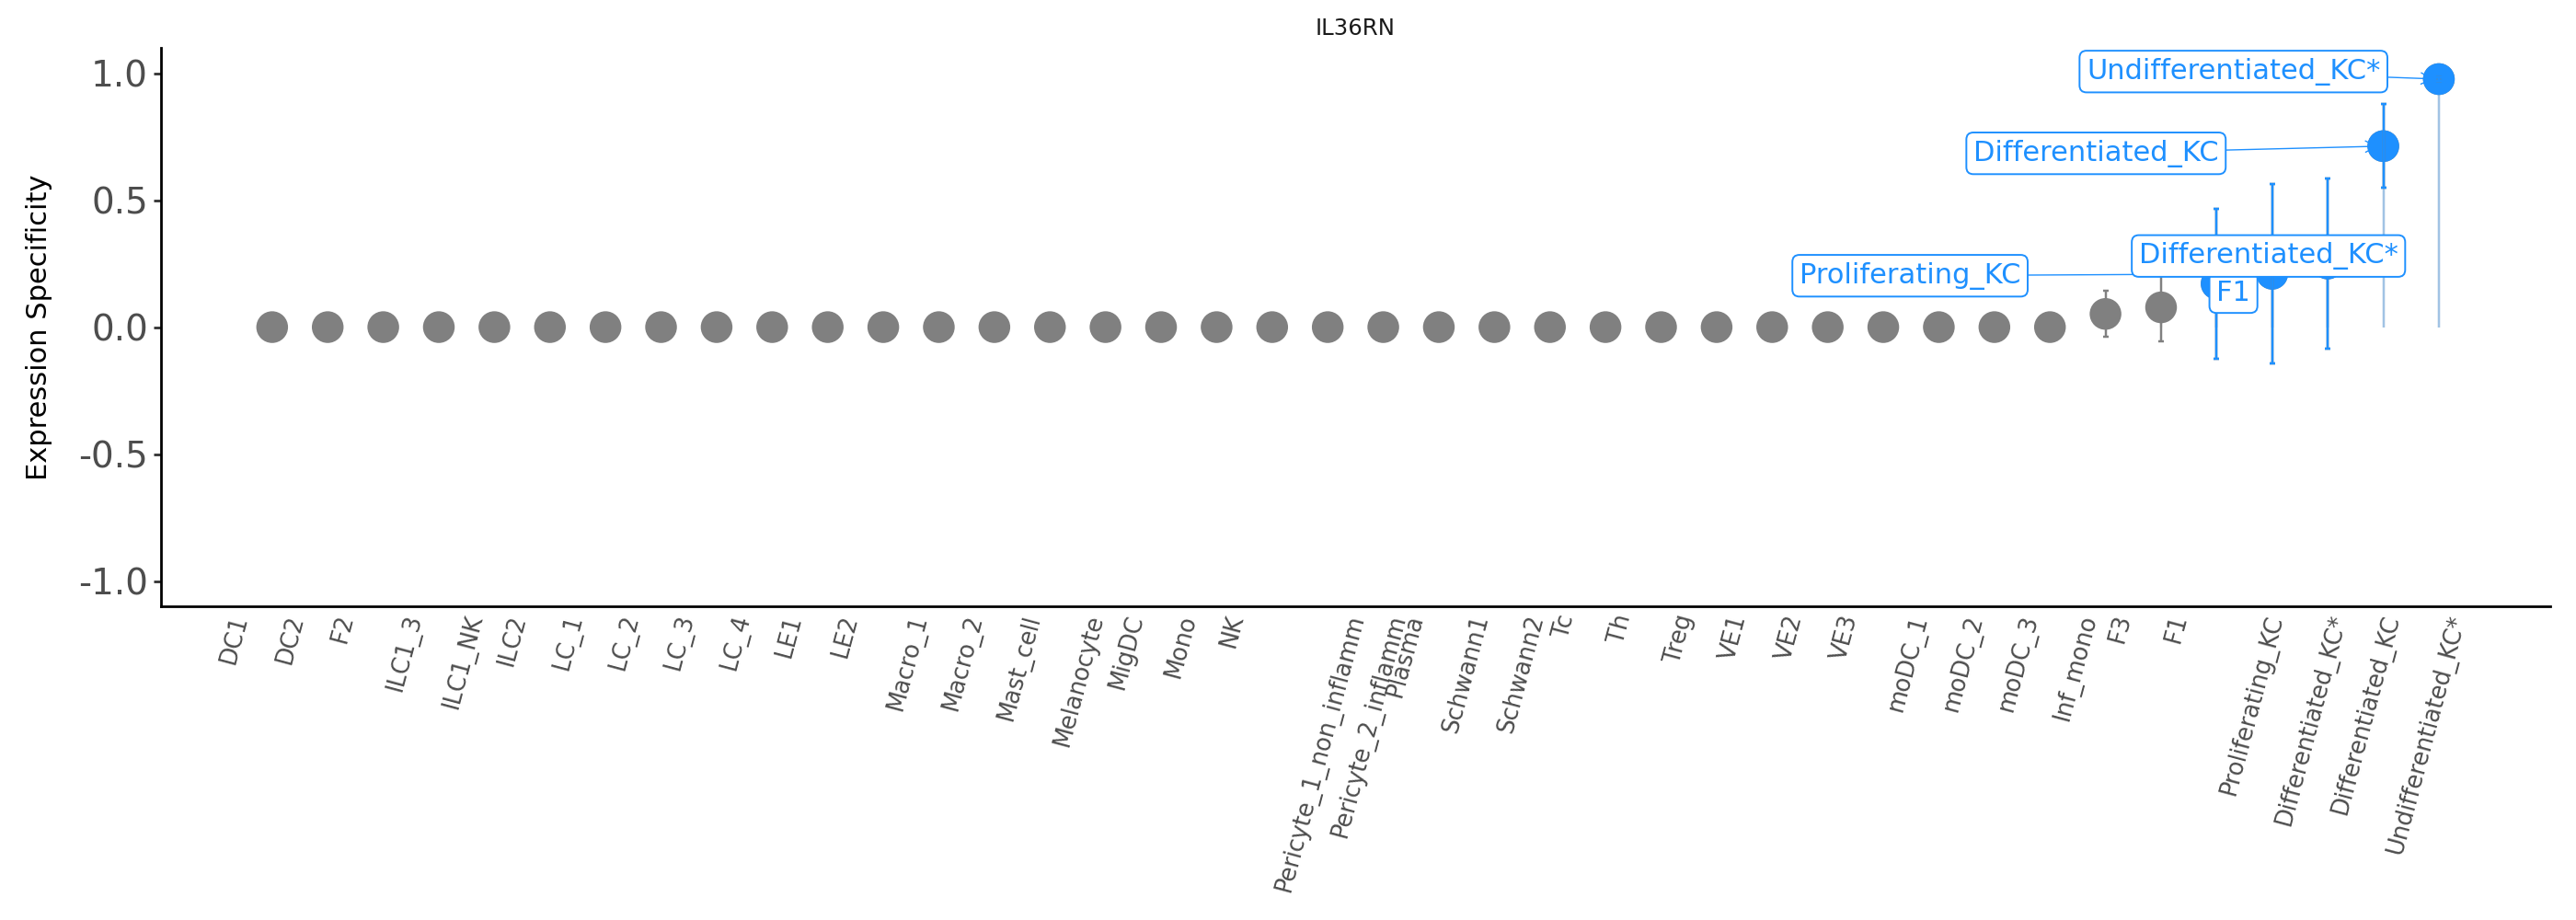

In [59]:
p_esmu = cellex.plotting.gene_profile(genes=["IL36RN"],figsize=(14,5), weights=eso.results["esmu"], stddev=eso.results["essd"], highlight_n=5)
p_esmu

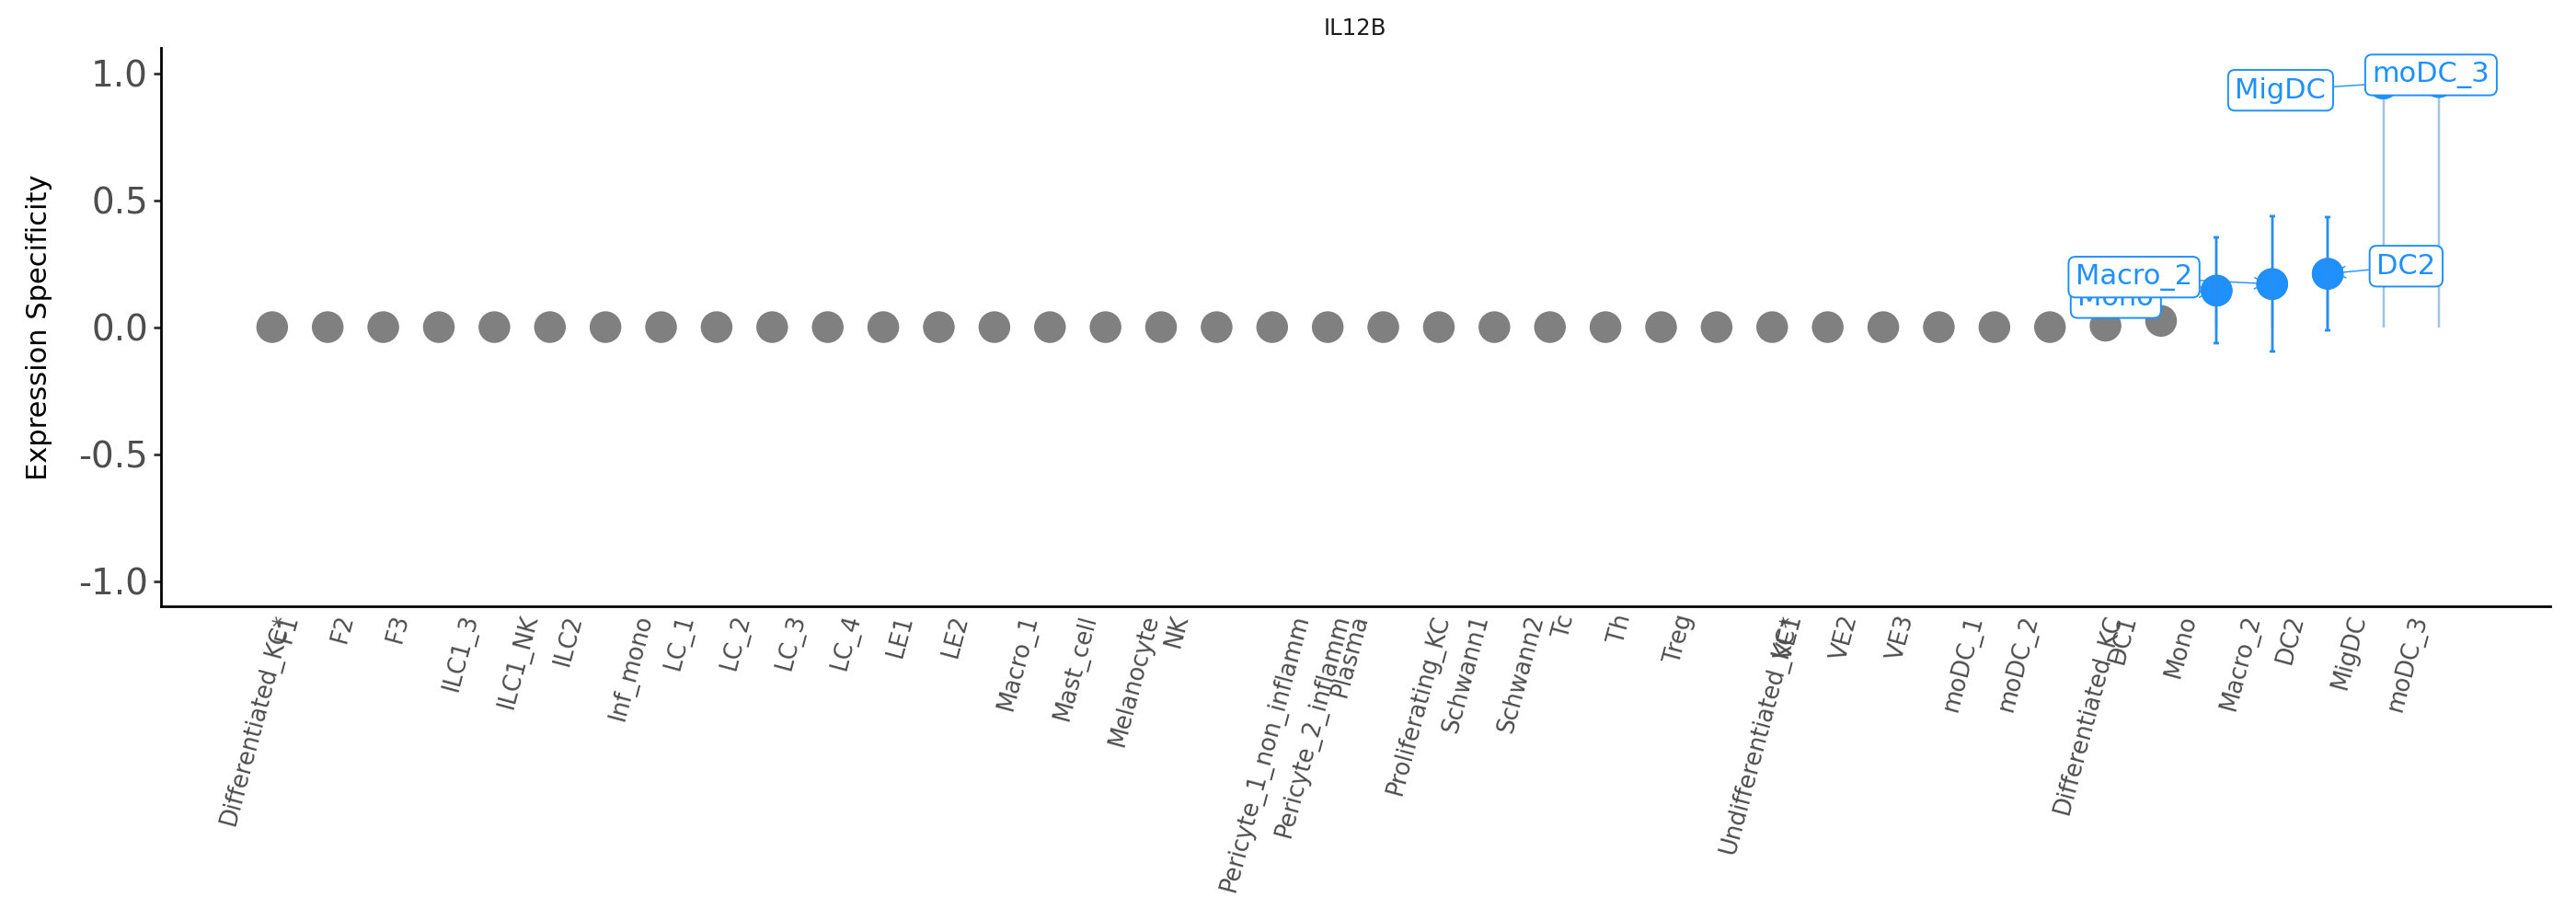

In [60]:
p_esmu = cellex.plotting.gene_profile(genes=["IL12B"],figsize=(14,5), weights=eso.results["esmu"], stddev=eso.results["essd"], highlight_n=5)
p_esmu

In [79]:
genes = [
    "CARD14", "IL36RN", "IL12B", "TYK2", "TRAF3IP2", "IL17RA", "IL23A", "TNF",
    "IL17A", "VDR", "PDE4A", "NR3C1", "AHR", "PDE4D", "DHFR", "RARA", "RARB",
    "RARG", "PDE4B", "PDE4C", "RXRA", "IFIH1", "RXRB", "ITGAL", "RXRG", "IL17F",
    "EGFL8", "PPIA", "TNFAIP3", "IL23R", "ZC3H12C", "IL13", "NFKBIA",
    "ERAP1", "KLF13", "IL1RL2", "ELMO1", "PRR5L","FAM8A1"
]

In [81]:
len(genes)  # for psoriasis we obtained 39 genes with overall association score >= 0.5

39

In [75]:
import os

# Ensure the output directory exists
output_dir = "gene_profiles"
os.makedirs(output_dir, exist_ok=True)

# List of genes
genes = [
    "CARD14", "IL36RN", "IL12B", "TYK2", "TRAF3IP2", "IL17RA", "IL23A", "TNF",
    "IL17A", "VDR", "PDE4A", "NR3C1", "AHR", "PDE4D", "DHFR", "RARA", "RARB",
    "RARG", "PDE4B", "PDE4C", "RXRA", "IFIH1", "RXRB", "ITGAL", "RXRG", "IL17F",
    "EGFL8", "PPIA", "TNFAIP3", "IL23R", "ZC3H12C", "IL13", "NFKBIA",
    "ERAP1", "KLF13", "IL1RL2", "ELMO1", "PRR5L","FAM8A1"
]

# Loop through and generate/save plots
for gene in genes:
    print(f"Processing: {gene}")
    fig = cellex.plotting.gene_profile(
        genes=[gene],
        figsize=(14, 5),
        weights=eso.results["esmu"],
        stddev=eso.results["essd"],
        highlight_n=5
    )
    
    # Save the ggplot object
    filepath = os.path.join(output_dir, f"{gene}.png")
    fig.save(filename=filepath, width=14, height=5, units='in', dpi=300)


Processing: CARD14
Processing: IL36RN
Processing: IL12B
Processing: TYK2
Processing: TRAF3IP2
Processing: IL17RA
Processing: IL23A
Processing: TNF
Processing: IL17A
Processing: VDR
Processing: PDE4A
Processing: NR3C1
Processing: AHR
Processing: PDE4D
Processing: DHFR
Processing: RARA
Processing: RARB
Processing: RARG
Processing: PDE4B
Processing: PDE4C
Processing: RXRA
Processing: IFIH1
Processing: RXRB
Processing: ITGAL
Processing: RXRG
Processing: IL17F
Processing: EGFL8
Processing: PPIA
Processing: TNFAIP3
Processing: IL23R
Processing: ZC3H12C
Processing: IL13
Processing: NFKBIA
Processing: ERAP1
Processing: KLF13
Processing: IL1RL2
Processing: ELMO1
Processing: PRR5L
Processing: FAM8A1


In [76]:

# genes with >= 0.5 global/association score based on opentargets
genes_to_plot = genes = [
    "CARD14",
    "IL36RN",
    "IL12B",
    "TYK2",
    "TRAF3IP2",
    "IL17RA",
    "IL23A",
    "TNF",
    "IL17A",
    "VDR",
    "PDE4A",
    "NR3C1",
    "AHR",
    "PDE4D",
    "DHFR",
    "RARA",
    "RARB",
    "RARG",
    "PDE4B",
    "PDE4C",
    "RXRA",
    "IFIH1",
    "RXRB",
    "ITGAL",
    "RXRG",
    "IL17F",
    "EGFL8",
    "PPIA",
    "TNFAIP3",
    "IL23R",
    "RIGI",
    "ZC3H12C",
    "IL13",
    "NFKBIA",
    "ERAP1",
    "KLF13",
    "IL1RL2",
    "ELMO1",
    "PRR5L",
    "NOS2",
    "PLCL2",
    "AP1S3",
    "DENND1B",
    "FAM8A1"
]


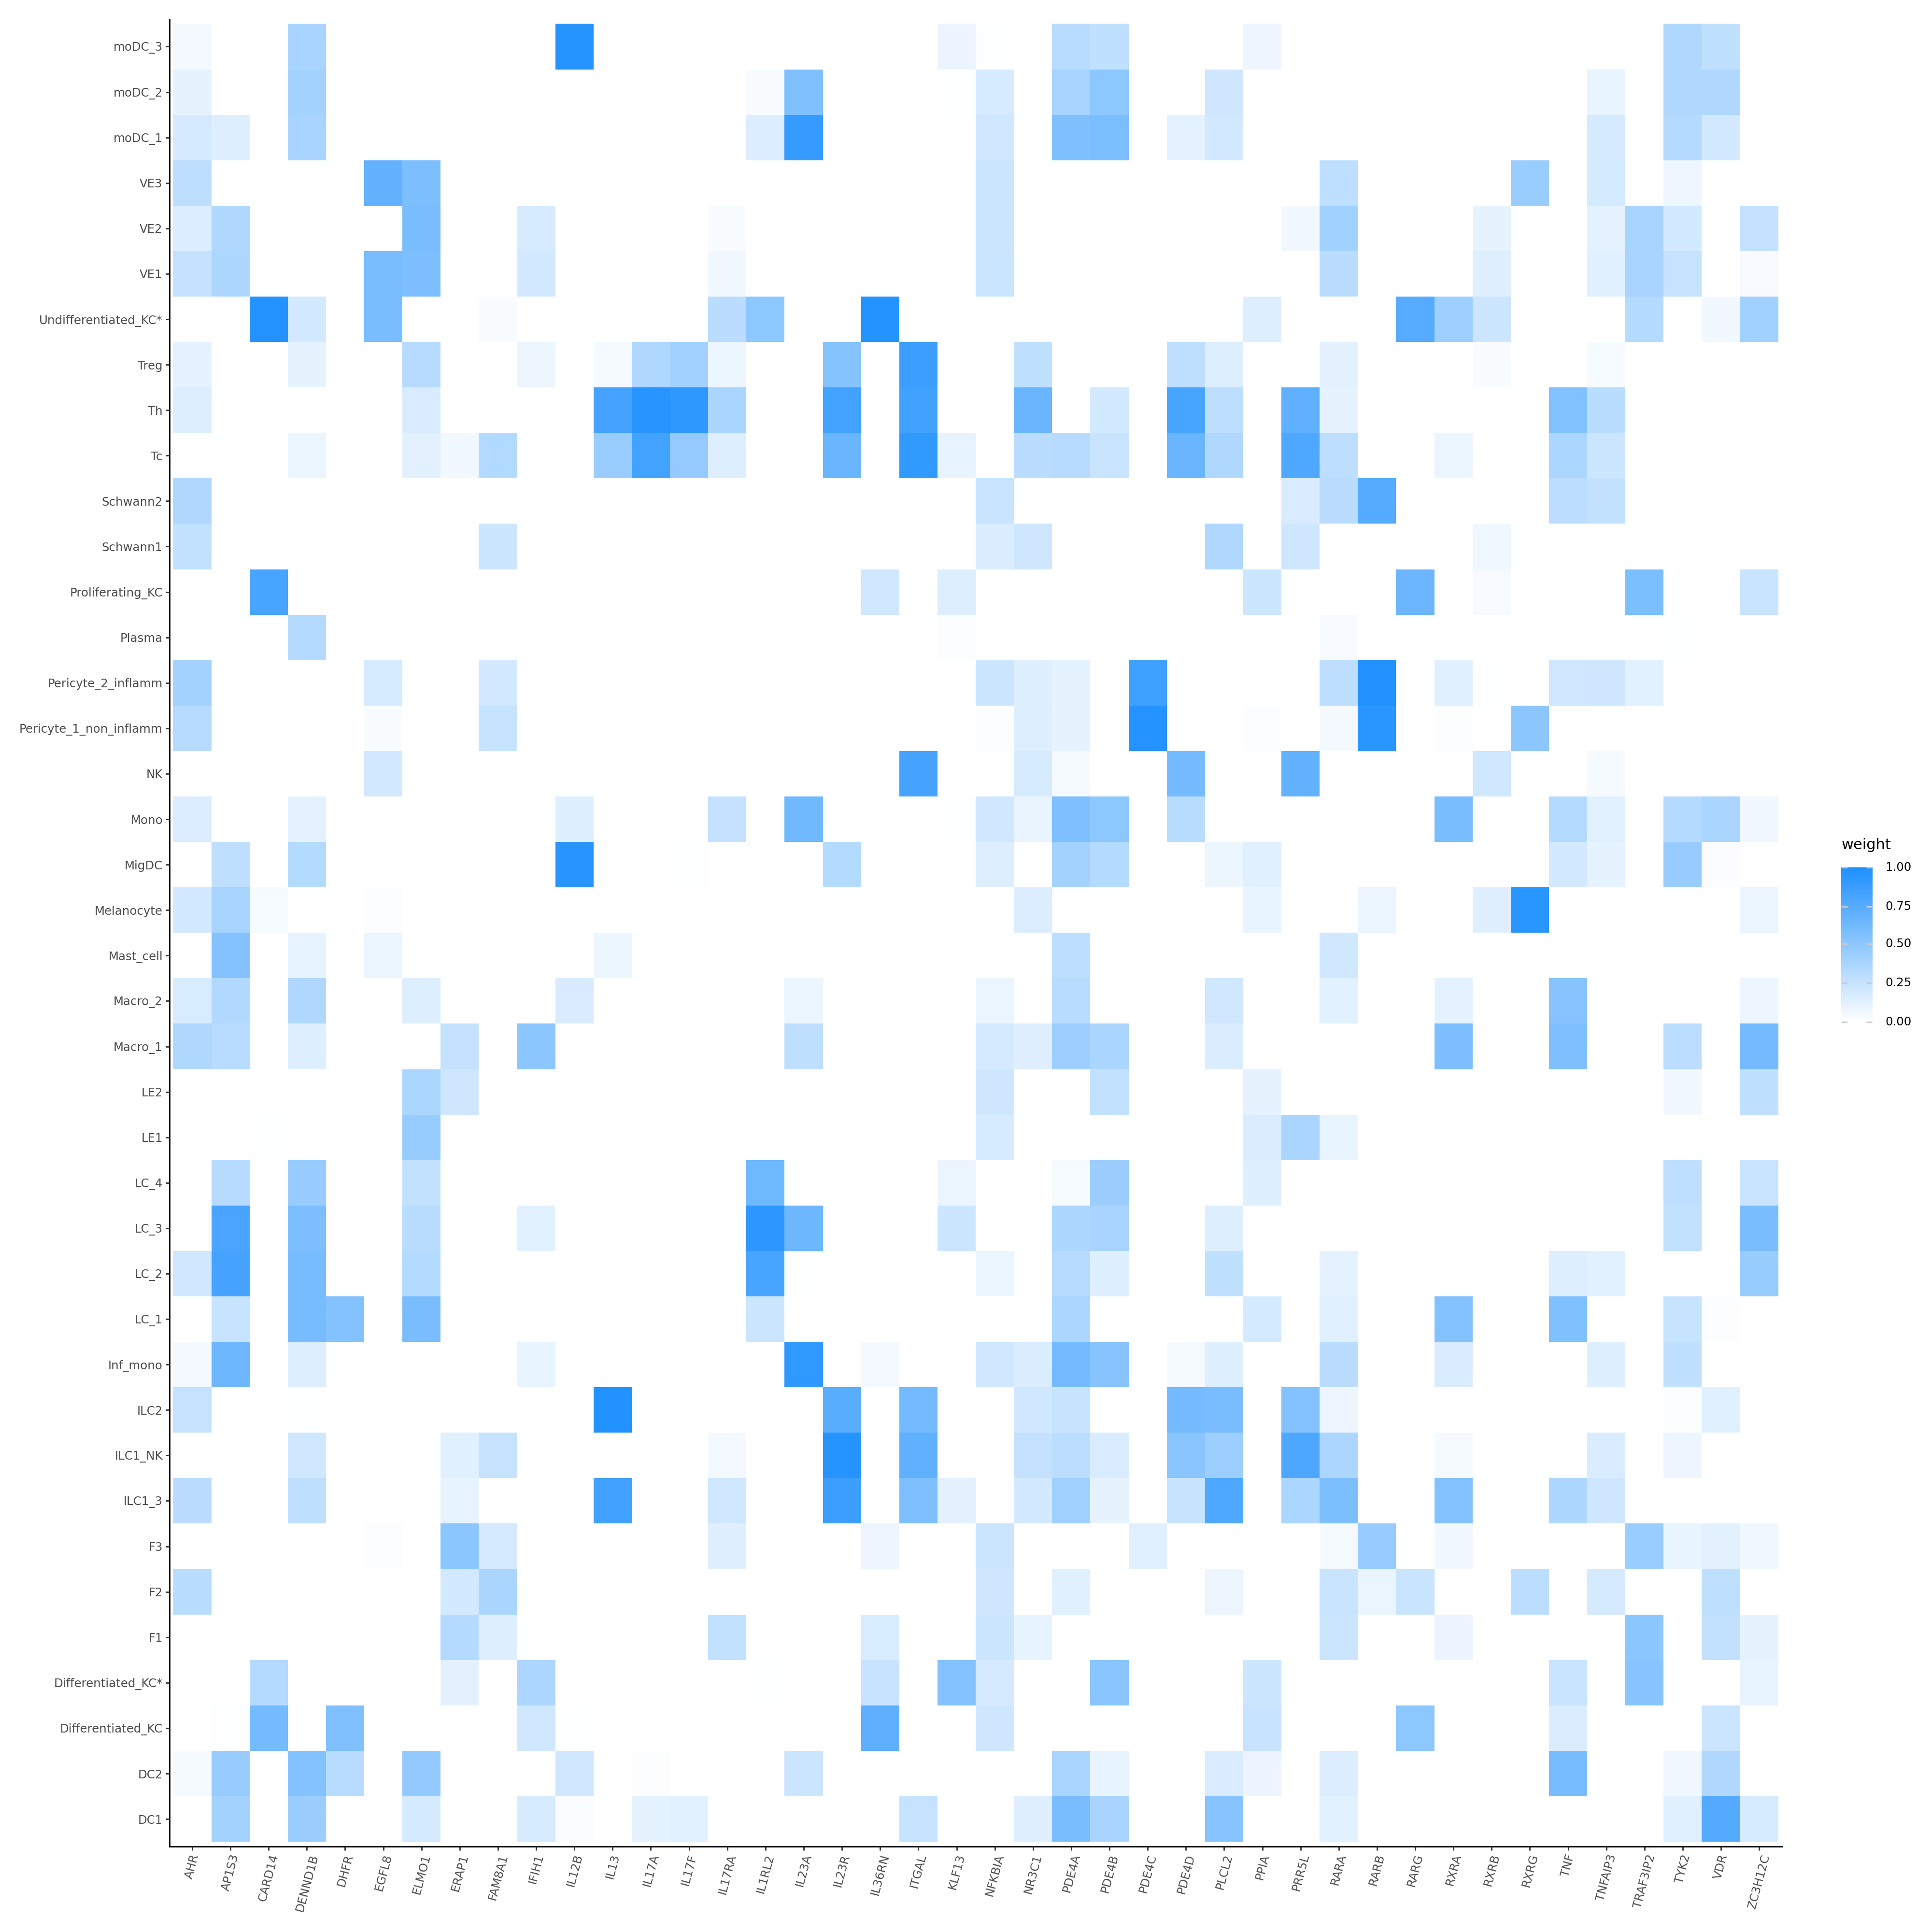

In [77]:
p_heatmap = cellex.plotting.heatmap(df_esmu, genes=genes_to_plot,)
p_heatmap

In [ ]:
import loompy # needed for importing data for this tutorial
import numpy as np # needed for formatting data for this tutorial
import pandas as pd # needed for formatting data for this tutorial
import cellex

In [74]:
cellex.plotting.n_es_genes(df_esmu, annotation=metadata_class)

AttributeError: 'str' object has no attribute 'loc'

In [83]:
eso.results["esmu"]


,DC1,DC2,Differentiated_KC,Differentiated_KC*,F1,F2,F3,ILC1_3,ILC1_NK,ILC2,...,Tc,Th,Treg,Undifferentiated_KC*,VE1,VE2,VE3,moDC_1,moDC_2,moDC_3
gene,,,,,,,,,,,,,,,,,,,,,
AL732372.1,0.000000,0.000000,0.683537,0.058337,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.683236,0.0,0.0,0.0,0.000000,0.000000,0.0
AL669831.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003206,0.399323,0.0,0.537141,...,0.033648,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.029015,0.0
FAM87B,0.000000,0.000000,0.000000,0.000000,0.661797,0.645255,0.675737,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
LINC00115,0.000000,0.000000,0.544921,0.000000,0.000000,0.000000,0.002762,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
FAM41C,0.000000,0.000000,0.582852,0.145716,0.000000,0.000000,0.000000,0.169416,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC007325.2,0.110212,0.563467,0.511254,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
AL354822.1,0.000000,0.000000,0.000000,0.000000,0.358636,0.000000,0.513753,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.468673,0.000000,0.0
AC004556.1,0.000000,0.073550,0.189600,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.529270,0.0


In [84]:
import pandas as pd

# Assuming your data is in a DataFrame like this:
df = eso.results["esmu"]

# Optional: if 'gene' is the index and you want to keep it as a column for sorting
df = df.reset_index()

# Choose how many top genes you want for each cell type
top_n = 10  # change as needed

# Dictionary to hold top genes per cell type
top_genes_per_celltype = {}

# Loop through each cell type (i.e., each column, excluding 'gene')
for col in df.columns:
    if col != 'gene':  # assuming 'gene' is a column now
        # Sort values descending by expression level in this column
        top_genes = df[['gene', col]].sort_values(by=col, ascending=False)
        # Keep only top N
        top_genes_per_celltype[col] = top_genes.head(top_n)

# Example: print top 5 genes for one cell type
print(top_genes_per_celltype['DC1'])


             gene       DC1
9363         PNOC  0.991397
12820      CLEC9A  0.990665
7487        GPR31  0.982611
3803         XCR1  0.982339
6925        PTCRA  0.981268
16798  AC104024.1  0.977199
14887        IGHD  0.977148
14769       TCL1A  0.973619
8568        CLCN4  0.972387
19973       NLRP4  0.971755


In [86]:
top_genes_per_celltype["Differentiated_KC"]


,gene,Differentiated_KC
8298,AKR1B10,0.993337
11165,TCN1,0.993187
1310,S100A7A,0.992960
881,CLCA2,0.991972
14849,ASPG,0.988039
12323,C10orf99,0.986733
15067,PLA2G4F,0.985637
19300,AC008556.1,0.982991
1264,THEM5,0.982088
19649,IGFL1,0.979083


In [85]:
eso.results["esmu"]

,DC1,DC2,Differentiated_KC,Differentiated_KC*,F1,F2,F3,ILC1_3,ILC1_NK,ILC2,...,Tc,Th,Treg,Undifferentiated_KC*,VE1,VE2,VE3,moDC_1,moDC_2,moDC_3
gene,,,,,,,,,,,,,,,,,,,,,
AL732372.1,0.000000,0.000000,0.683537,0.058337,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.683236,0.0,0.0,0.0,0.000000,0.000000,0.0
AL669831.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003206,0.399323,0.0,0.537141,...,0.033648,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.029015,0.0
FAM87B,0.000000,0.000000,0.000000,0.000000,0.661797,0.645255,0.675737,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
LINC00115,0.000000,0.000000,0.544921,0.000000,0.000000,0.000000,0.002762,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
FAM41C,0.000000,0.000000,0.582852,0.145716,0.000000,0.000000,0.000000,0.169416,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC007325.2,0.110212,0.563467,0.511254,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
AL354822.1,0.000000,0.000000,0.000000,0.000000,0.358636,0.000000,0.513753,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.468673,0.000000,0.0
AC004556.1,0.000000,0.073550,0.189600,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.529270,0.0


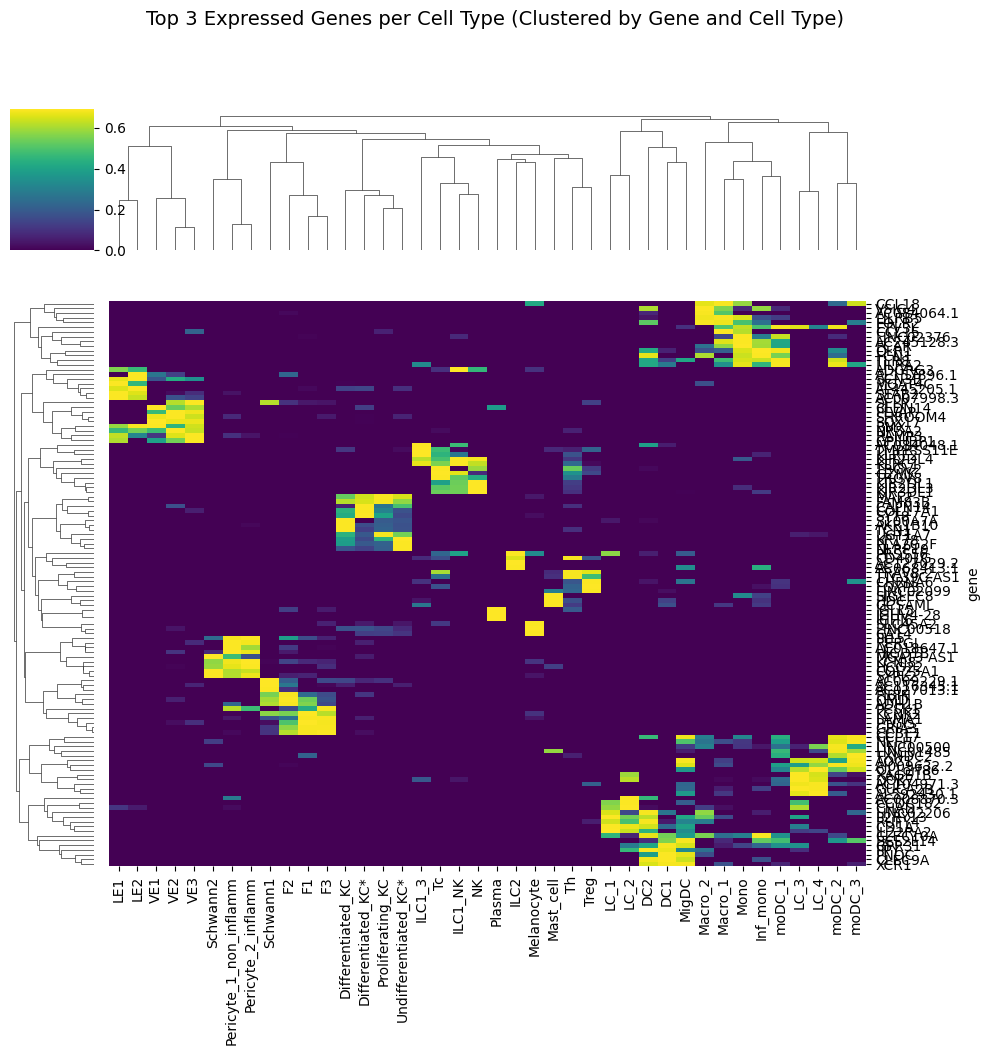

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set how many top genes you want per cell type
top_n = 3

# Step 1: Extract top N genes per cell type
top_genes_per_celltype = {}
df = eso.results["esmu"].reset_index()

for col in df.columns:
    if col != 'gene':
        top_genes = df[['gene', col]].sort_values(by=col, ascending=False).head(top_n)
        top_genes_per_celltype[col] = top_genes

# Step 2: Collect unique genes across all cell types
top_genes_set = set()
for df_top in top_genes_per_celltype.values():
    top_genes_set.update(df_top['gene'])

# Step 3: Filter original matrix to just top genes
df_expr = eso.results["esmu"].loc[list(top_genes_set)]

# Step 4: Optional log1p transform for visibility
df_expr_log = df_expr.applymap(lambda x: np.log1p(x))

# Step 5: Clustered heatmap (both rows and columns)
sns.clustermap(
    df_expr_log,
    cmap='viridis',
    figsize=(10,10),
    row_cluster=True,      # cluster genes
    col_cluster=True,      # also cluster cell types
    xticklabels=True,
    yticklabels=True,
    dendrogram_ratio=(.1, .2),
    cbar_pos=(0.02, 0.8, 0.03, 0.18)
)

plt.suptitle(f"Top {top_n} Expressed Genes per Cell Type (Clustered by Gene and Cell Type)", y=1.05, fontsize=14)
plt.tight_layout()
plt.show()
